# Creating a Multiple Linear Regression Model for Wine Quality (Validation Data)

In [1]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [2]:
#Reading in dataset
validation = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_validation.csv")

#Changing column names in train and test datasets 
validation.columns = [col.replace(' ', '_') for col in validation.columns]

In [ ]:
#The updated model from the training data
model_mlr = smf.ols(
    "quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = validation).fit()
model_mlr.summary()

#Some not signficiant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           9.52e-40
Time:                        17:39:21   Log-Likelihood:                -696.46
No. Observations:                 650   AIC:                             1411.
Df Residuals:                     641   BIC:                             1451.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4229      0.415      5.839      0.000       1.608       3.238
Wine_Type[T.White]      -0.1332      0.139     -0.956      0.340      -0.407       0.140
alcohol                  0.3422      0.031     11.134      0.000       0.282       0.403
volatile_acidity        -1.1398      0.247     -4.616      0.000      -1.625      -0.655
sulphates                0.5946      0.248      2.400      0.017       0.108       1.081
residual_sugar           0.0233      0.007      3.279      0.001       0.009       0.037
free_sulfur_dioxide      0.0017      0.002      0.864      0.388      -0.002       0.006
total_sulfur_dioxide    -0.0012      0.001     -1.220      0.223      -0.003       0.001
chlorides               -1.3810      1.391     -0.993      0.321      -4.111       1.350
==============================================================================
Omnibus:                       20.242   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.334
Skew:                          -0.174   Prob(JB):                     4.74e-09
Kurtosis:                       4.138   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

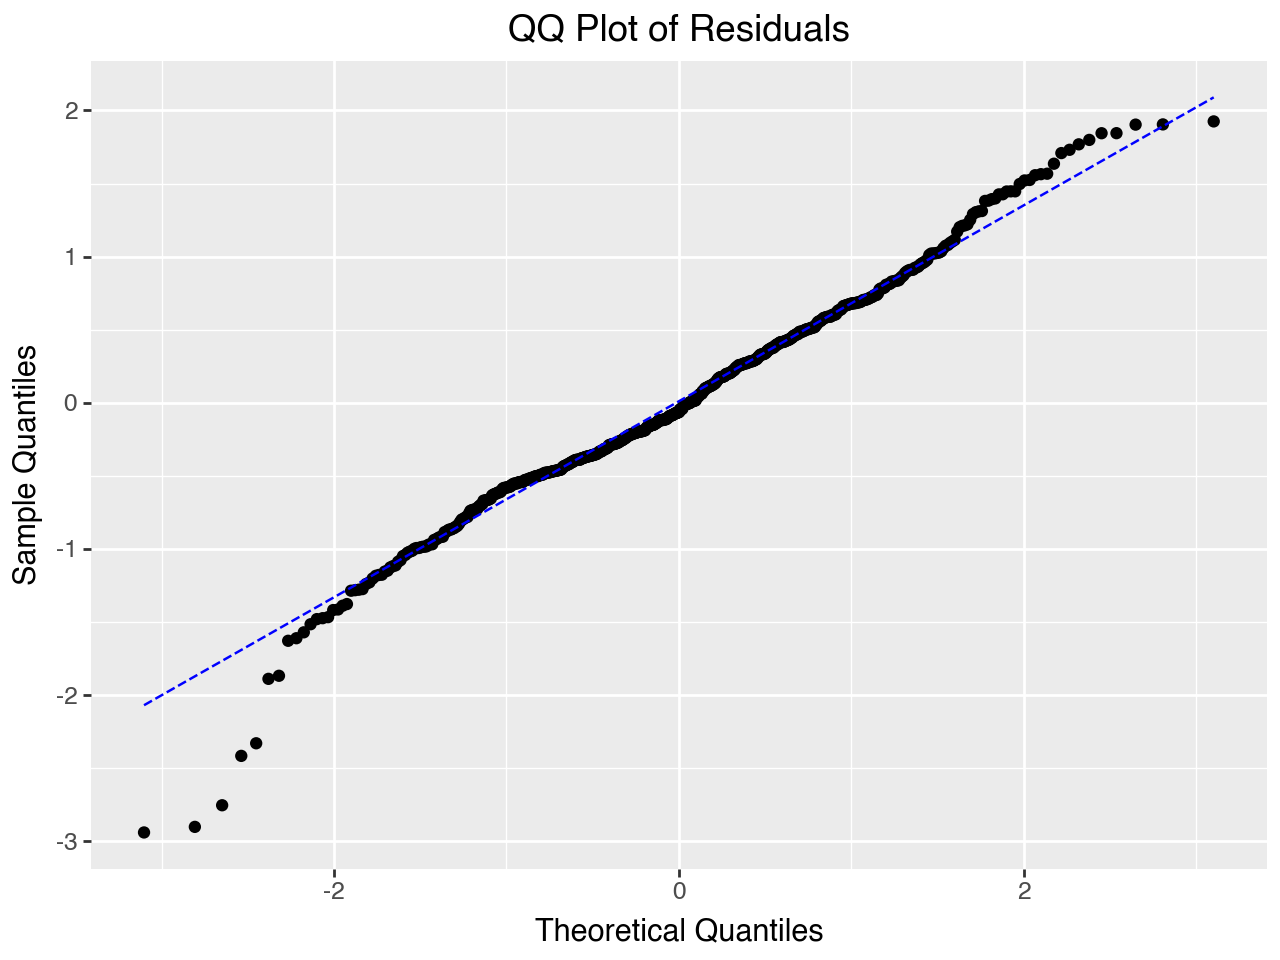

P-value is: 0.000004


In [5]:
#Need to test our assumptions for the model

#First assumption - Check for Normality
#Identifying the model residuals
validation['pred_mlr'] = model_mlr.predict()
validation['resid_mlr'] = model_mlr.resid

p = (
   ggplot(validation, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Looks relatively Normal, but Leptokurtic

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#P-value is zero indicates our residuals are not normal

In [ ]:
#We will account for the Non-Normality by doing a log transformation 
#Doing a log transofrmation on quality
validation['log_quality'] = np.log(validation['quality'])

#Fitting new model with log(quality) as the response variable
model_mlr = smf.ols(
    "log_quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = validation).fit()
model_mlr.summary()

#Still no multicollinearity - double checked in R

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_quality   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     27.50
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           8.24e-37
Time:                        17:39:41   Log-Likelihood:                 425.13
No. Observations:                 650   AIC:                            -832.3
Df Residuals:                     641   BIC:                            -792.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2025      0.074     16.274      0.000       1.057       1.348
Wine_Type[T.White]      -0.0239      0.025     -0.962      0.336      -0.073       0.025
alcohol                  0.0569      0.005     10.394      0.000       0.046       0.068
volatile_acidity        -0.2084      0.044     -4.740      0.000      -0.295      -0.122
sulphates                0.1023      0.044      2.320      0.021       0.016       0.189
residual_sugar           0.0044      0.001      3.481      0.001       0.002       0.007
free_sulfur_dioxide      0.0001      0.000      0.366      0.715      -0.001       0.001
total_sulfur_dioxide    -0.0002      0.000     -1.397      0.163      -0.001    9.97e-05
chlorides               -0.2905      0.248     -1.173      0.241      -0.777       0.196
==============================================================================
Omnibus:                      107.317   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.327
Skew:                          -0.809   Prob(JB):                     6.77e-68
Kurtosis:                       5.967   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

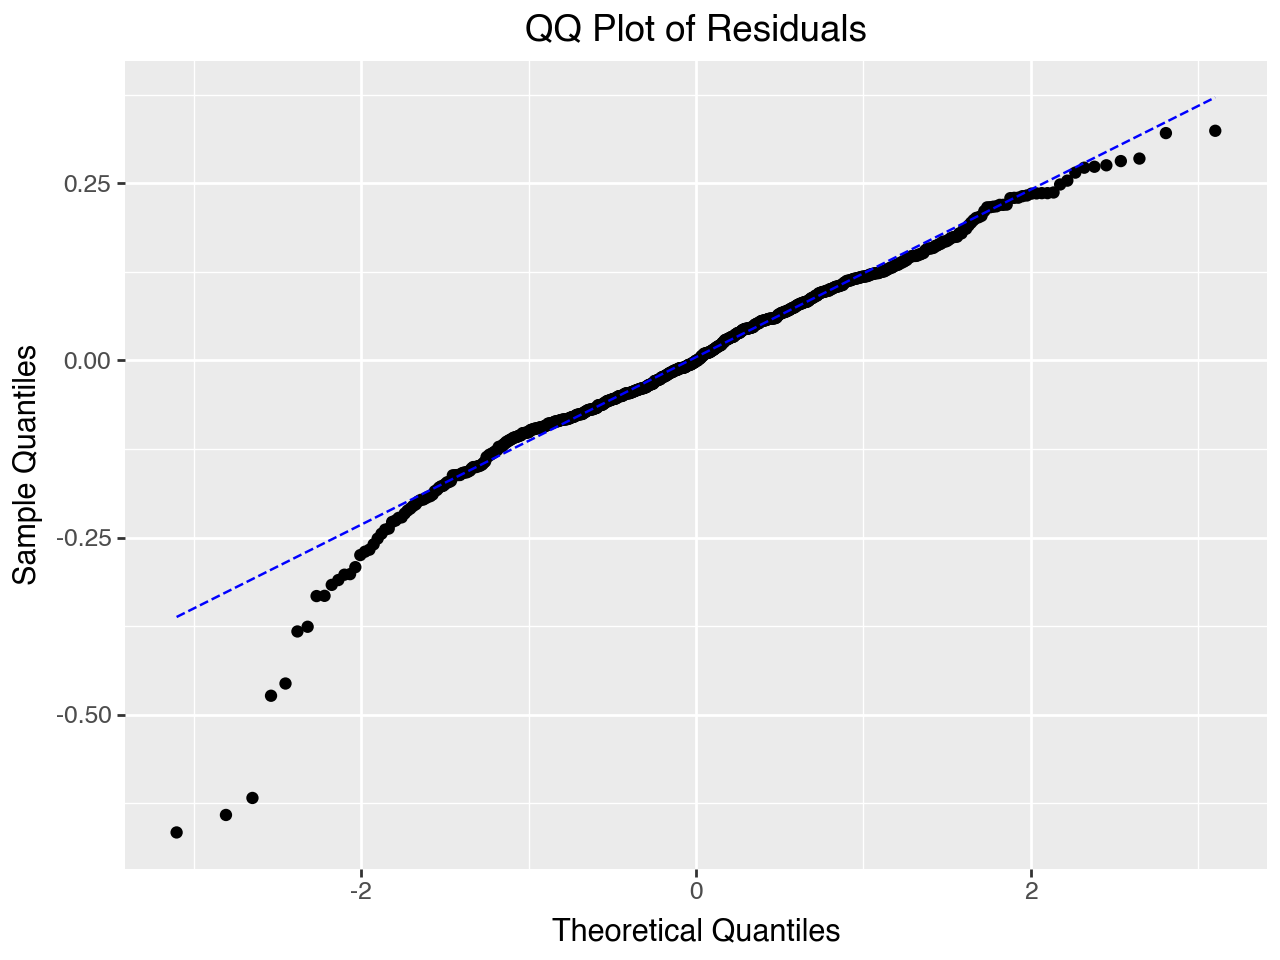

P-value is: 0.000000


In [7]:
#Checking Normality after accounting for Non-Normality with log transformation
validation['pred_mlr'] = model_mlr.predict()
validation['resid_mlr'] = model_mlr.resid

p = (
   ggplot(validation, aes(sample="resid_mlr")) +
   geom_qq() +
   geom_qq_line(color="blue", linetype="dashed") +
   labs(title="QQ Plot of Residuals", x="Theoretical Quantiles", y="Sample Quantiles")
)
p.show()

#Check Normality with Shapiro-Wilk Test
shap_test = sp.stats.shapiro(model_mlr.resid)
print(f"P-value is: {shap_test.pvalue:4f}")

#Still Not-Normal - but at least it is accounted for

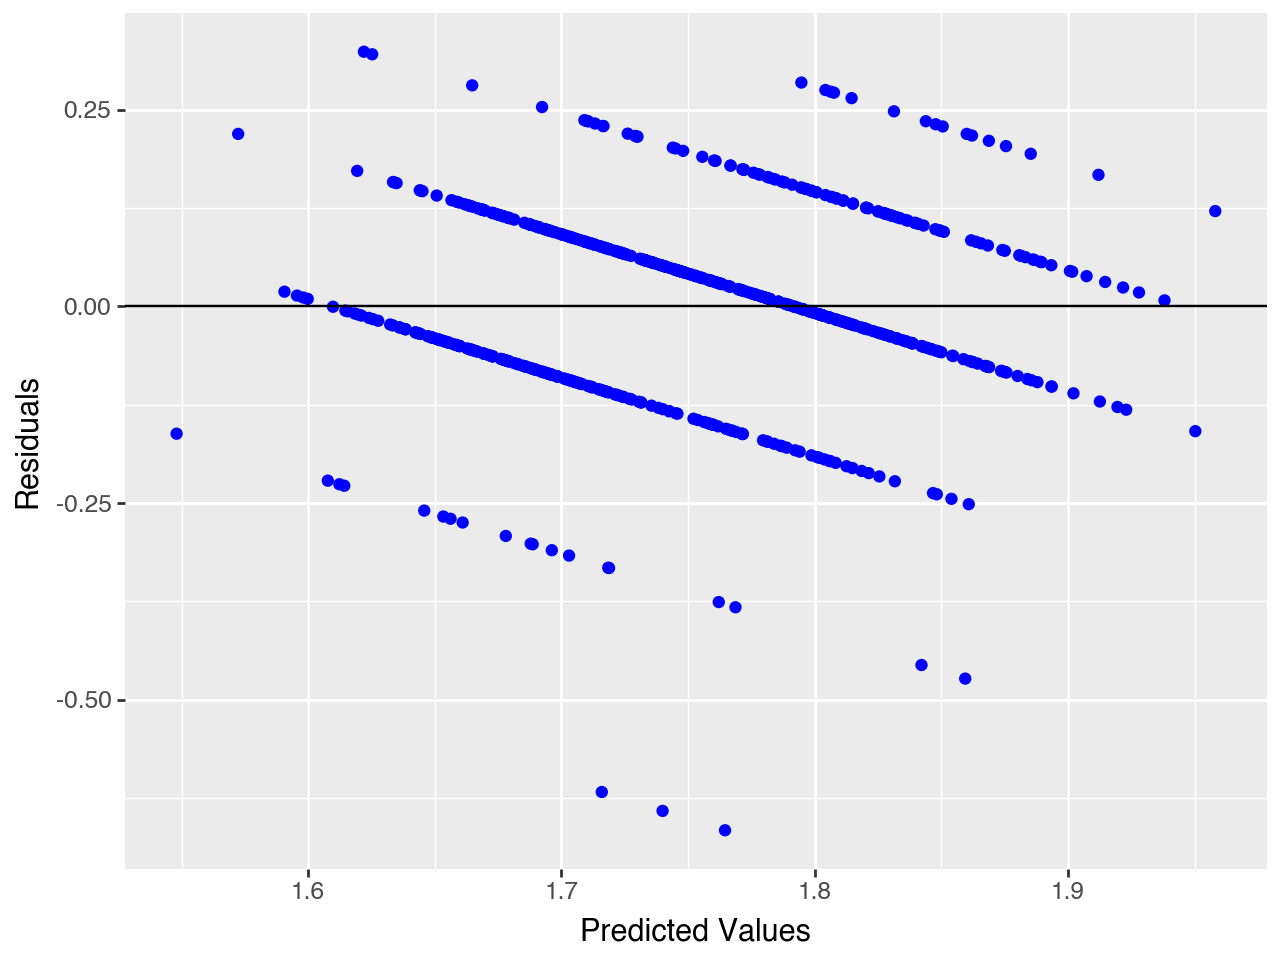

Spearman correlation: -0.03714203222344947
P-value: 0.3444325926549777


In [8]:
#Second Assumption - Checking for equality of variances 

#Plotting residuals with a scatterplot 
p=(ggplot(validation, aes(x="pred_mlr",y="resid_mlr")) +geom_point(color="blue") +
          geom_hline(yintercept = 0) + 
          labs(x="Predicted Values", y="Residuals")
         )

p.show()

#Weird pattern because of quality being on a scale of 1-10, no inbetween values

#Can also check equal variances with Spearman's Rank Correlation
validation['abs_resid']=validation['resid_mlr'].abs()
correlation, p_value = spearmanr(validation['pred_mlr'], validation['abs_resid'])
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

#P-value greater than 0.05 indicates equal variances
#Already accounted for any heteroscedasticity with the log transformation

In [9]:
#Final summary
model_mlr = smf.ols(
    "log_quality ~ alcohol + volatile_acidity + sulphates + residual_sugar + Wine_Type + free_sulfur_dioxide + total_sulfur_dioxide + chlorides", 
    data = validation).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_quality   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     27.50
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           8.24e-37
Time:                        17:40:33   Log-Likelihood:                 425.13
No. Observations:                 650   AIC:                            -832.3
Df Residuals:                     641   BIC:                            -792.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2025      0.074     16.274      0.000       1.057       1.348
Wine_Type[T.White]      -0.0239      0.025     -0.962      0.336      -0.073       0.025
alcohol                  0.0569      0.005     10.394      0.000       0.046       0.068
volatile_acidity        -0.2084      0.044     -4.740      0.000      -0.295      -0.122
sulphates                0.1023      0.044      2.320      0.021       0.016       0.189
residual_sugar           0.0044      0.001      3.481      0.001       0.002       0.007
free_sulfur_dioxide      0.0001      0.000      0.366      0.715      -0.001       0.001
total_sulfur_dioxide    -0.0002      0.000     -1.397      0.163      -0.001    9.97e-05
chlorides               -0.2905      0.248     -1.173      0.241      -0.777       0.196
==============================================================================
Omnibus:                      107.317   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.327
Skew:                          -0.809   Prob(JB):                     6.77e-68
Kurtosis:                       5.967   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""